In [1]:
# import bibliotek
import os
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DATA_PATH = '../data/housing.csv'
MODEL_PATH = '../models/housing_model.pkl'
TEST_DATA_PATH = ("../data/test_data.pkl")

In [3]:
model = joblib.load(MODEL_PATH)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x117801d00>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
            

In [4]:
X_test, y_test = joblib.load(TEST_DATA_PATH)

In [5]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN


In [6]:
y_test.head()

20046    10.772708
3024     10.732061
15663    13.122367
20484    12.295003
9814     12.535380
Name: median_house_value, dtype: float64

In [7]:
y_test_exp = np.expm1(y_test)

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred_exp = np.expm1(y_pred)

In [10]:
rmse = root_mean_squared_error(y_test_exp, y_pred_exp)
print(f"Root mean squared error: {rmse}")

Root mean squared error: 58231.072087443084


In [11]:
r2 = r2_score(y_test_exp, y_pred_exp)
print(f"R2 Score Error error: {r2}")

R2 Score Error error: 0.741236681619436


In [12]:
mae = mean_absolute_error(y_test_exp, y_pred_exp)
print(f"MAE error: {mae}")

MAE error: 38448.92281894598


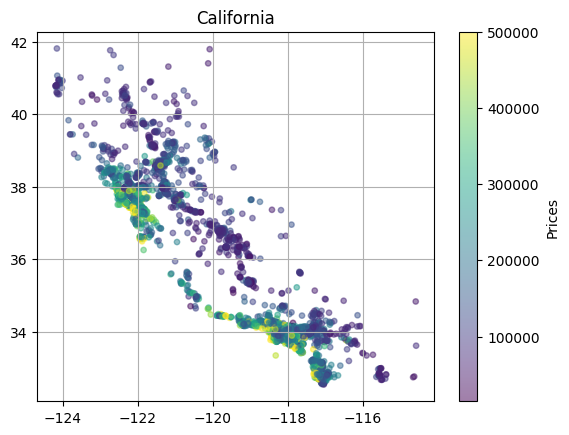

In [13]:
plt.scatter(X_test['longitude'], X_test['latitude'],
            c=y_test_exp, s=15, alpha=0.5)
plt.title('California')
plt.colorbar(label = 'Prices')
plt.grid(True)
plt.show()

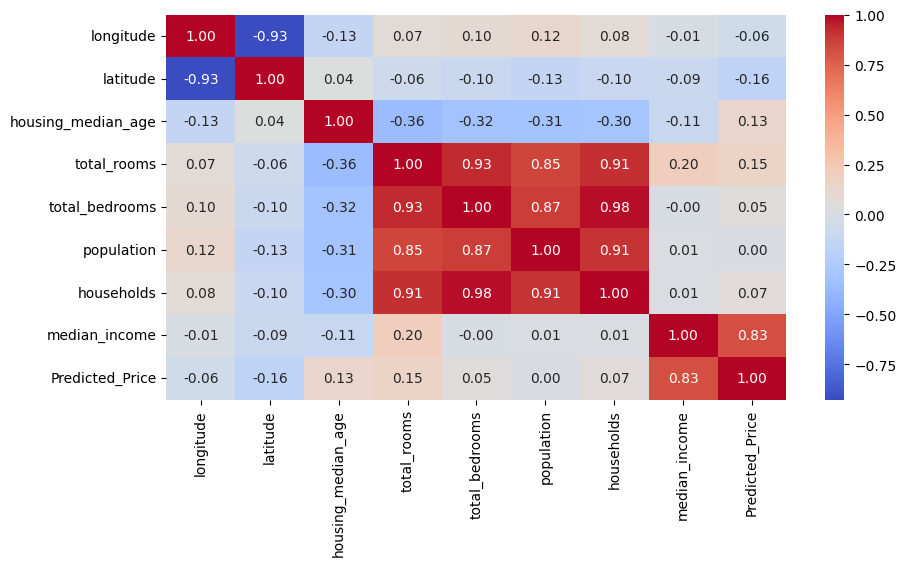

In [14]:
plt.figure(figsize=(10,5))

y_pred_series = pd.Series(y_pred_exp, index=X_test.index, name='Predicted_Price')

new_dataframe = pd.concat([
    X_test,
    y_pred_series
], axis=1)

# data_to_corelation = pd.get_dummies(new_dataframe)
data_to_corelation = new_dataframe.select_dtypes(include=[np.number])
sns.heatmap(data_to_corelation.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


In [15]:
feature_importances = model.named_steps['classifier'].feature_importances_
indices = np.argsort(feature_importances)
preprocessor = model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

df_importance = df_importance.sort_values(by='importance', ascending=True)

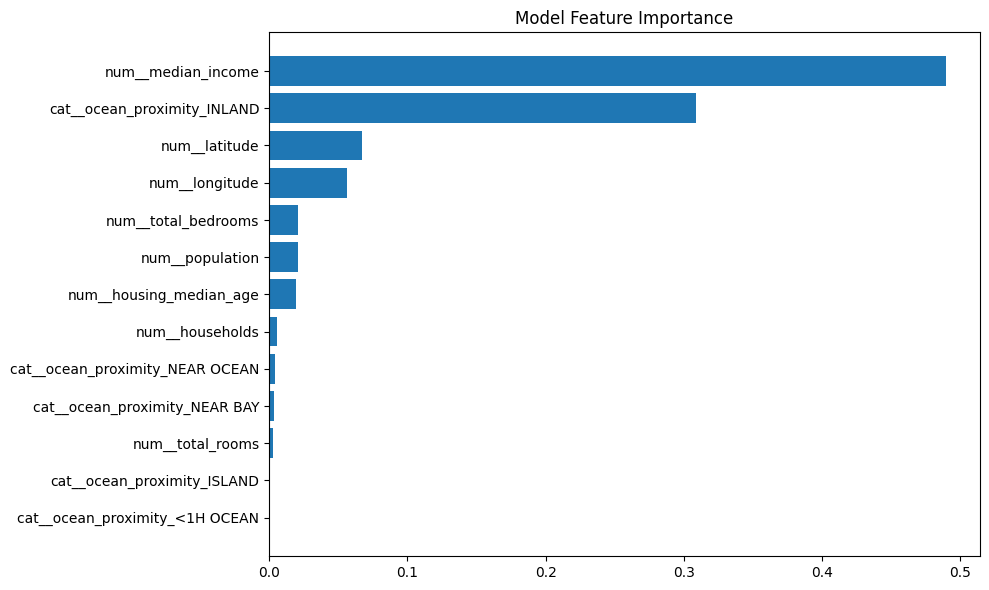

In [16]:
plt.figure(figsize=(10,6))
plt.title("Model Feature Importance")
plt.barh(df_importance['feature'], df_importance['importance'], align='center')
plt.tight_layout()
plt.show()

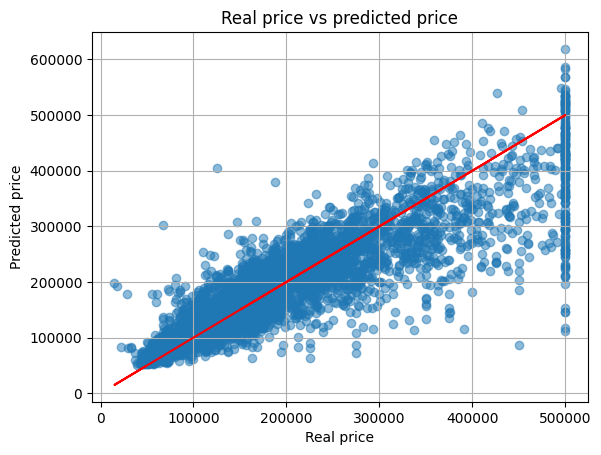

In [17]:
plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
plt.plot(y_test_exp, y_test_exp, color="red")
plt.title('Real price vs predicted price')
plt.xlabel('Real price')
plt.ylabel('Predicted price') 
plt.grid(True)
plt.show()

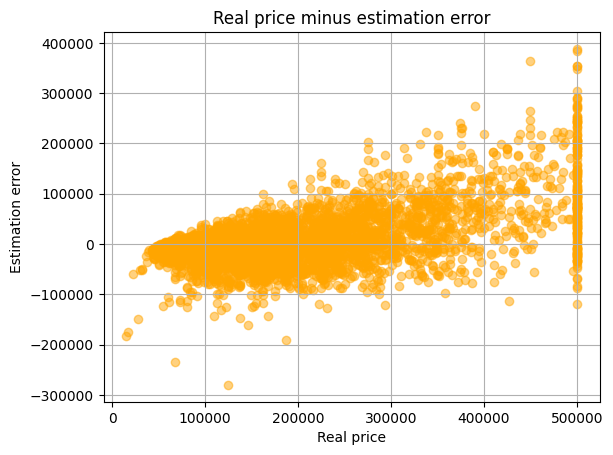

In [18]:
plt.scatter(y_test_exp, (y_test_exp  -y_pred_exp), color="orange", alpha=0.5)
plt.grid(True)
plt.title('Real price minus estimation error')
plt.xlabel('Real price')
plt.ylabel('Estimation error') 
plt.show()

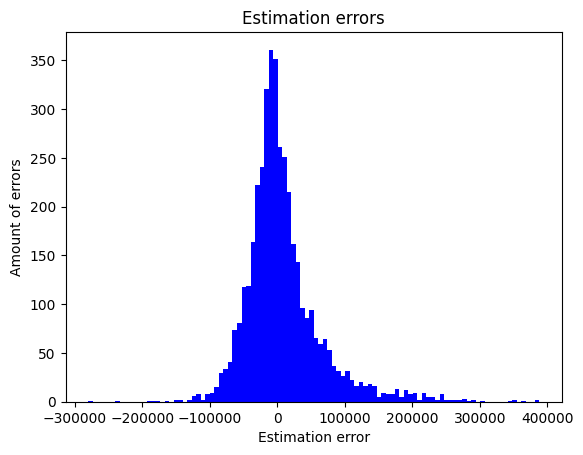

In [19]:
plt.hist((y_test_exp  - y_pred_exp), bins=100, color="blue")
plt.title('Estimation errors')
plt.xlabel('Estimation error')
plt.ylabel('Amount of errors') 
plt.show()